# Used libraries

In [9]:
import os
import numpy as np
import pandas as pd
import datetime

import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import pyreadstat

from statsmodels.stats.weightstats import DescrStatsW

# Indicator from SES

- รายได้เฉลี่ยต่อหัวของกลุ่มประชากรร้อยละ 40 ที่มีรายได้ต่ำสุด
- ค่าสัมประสิทธิ์ความไม่เสมอภาค (Gini) ด้านรายได้
- การถือครองสินทรัพย์ทางการเงินของกลุ่มครัวเรือนร้อยละ 40 ที่มีรายได้ต่้าสุด
- สัดส่วนประชากรที่อยู่ใต้เส้นความยากจน
- สัดส่วนหนี้สินต่อรายได้ทั้งหมดของครัวเรือนของกลุ่มครัวเรือนที่ยากจนที่สุด
- อัตราส่วนรายจ่ายในการชำระหนี้ต่อรายได้ต่อเดือน ของกลุ่มครัวเรือนยากจนที่สุด
- Income ratio ระหว่าง Top/Bottom ต่าง ๆ (90P10P, 90P50P, 50P10P)

In [10]:
filelist = []
i = 0
for dirname, _, filenames in os.walk('D:\TDRI CODE\SES\\'):
    for filename in filenames:
        filelist.append(os.path.join(dirname, filename))
        print('file',i,':',os.path.join(dirname, filename))
        i+=1
SES20 = [s for s in filelist if 'SES20' in s]
SES19 = [s for s in filelist if 'SES19' in s]
SES17 = [s for s in filelist if 'SES17' in s]
SES15 = [s for s in filelist if 'SES15' in s]
SES13 = [s for s in filelist if 'SES13' in s]
SES11 = [s for s in filelist if 'SES11' in s]
WT = [s for s in filelist if 'weight' in s]

WT

file 0 : D:\TDRI CODE\SES\.RData
file 1 : D:\TDRI CODE\SES\.Rhistory
file 2 : D:\TDRI CODE\SES\Aging SES.R
file 3 : D:\TDRI CODE\SES\AgriLand.ipynb
file 4 : D:\TDRI CODE\SES\BucketLand.xlsx
file 5 : D:\TDRI CODE\SES\BucketLandown.xlsx
file 6 : D:\TDRI CODE\SES\datadic_2011.xlsx
file 7 : D:\TDRI CODE\SES\datadic_2013.xls
file 8 : D:\TDRI CODE\SES\Datadic_2015.xls
file 9 : D:\TDRI CODE\SES\Datadic_2017.xls
file 10 : D:\TDRI CODE\SES\Datadic_2019.xls
file 11 : D:\TDRI CODE\SES\DecilebyExpenditure.xlsx
file 12 : D:\TDRI CODE\SES\Decilebyland.xlsx
file 13 : D:\TDRI CODE\SES\GamblingShare.xlsx
file 14 : D:\TDRI CODE\SES\gini.sps
file 15 : D:\TDRI CODE\SES\Inequality Situation.ipynb
file 16 : D:\TDRI CODE\SES\Kaset.R
file 17 : D:\TDRI CODE\SES\Lottery.ipynb
file 18 : D:\TDRI CODE\SES\Lottery.xlsx
file 19 : D:\TDRI CODE\SES\.ipynb_checkpoints\AgriLand-checkpoint.ipynb
file 20 : D:\TDRI CODE\SES\.ipynb_checkpoints\Inequality Situation-checkpoint.ipynb
file 21 : D:\TDRI CODE\SES\.ipynb_checkpoin

['D:\\TDRI CODE\\SES\\weight\\hhid\\hhid.sps',
 'D:\\TDRI CODE\\SES\\weight\\weight11\\weight11.sav',
 'D:\\TDRI CODE\\SES\\weight\\weight13\\weight13.sav',
 'D:\\TDRI CODE\\SES\\weight\\weight15\\weight15.sav',
 'D:\\TDRI CODE\\SES\\weight\\weight17\\weight17.sav',
 'D:\\TDRI CODE\\SES\\weight\\weight19\\weight19.sav']

In [11]:
filelist[211]

'D:\\TDRI CODE\\SES\\SES19\\REC1_19.sav'

In [17]:
WT

['D:\\TDRI CODE\\SES\\weight\\hhid\\hhid.sps',
 'D:\\TDRI CODE\\SES\\weight\\weight11\\weight11.sav',
 'D:\\TDRI CODE\\SES\\weight\\weight13\\weight13.sav',
 'D:\\TDRI CODE\\SES\\weight\\weight15\\weight15.sav',
 'D:\\TDRI CODE\\SES\\weight\\weight17\\weight17.sav',
 'D:\\TDRI CODE\\SES\\weight\\weight19\\weight19.sav']

In [13]:
j=195
print(filelist[j])
print(filelist[211])
df, meta = pyreadstat.read_sav(filelist[j])

weight, meta1 = pyreadstat.read_sav(filelist[211])
weight.rename(columns={'hhid': 'NEW_HH_NO'}, inplace=True)
weight.columns = [x.upper() for x in weight.columns]

df = pd.merge(df,weight,on='NEW_HH_NO')
df

D:\TDRI CODE\SES\SES17\Microdata\ses2017q1234_record18part1.sav
D:\TDRI CODE\SES\SES19\REC1_19.sav


,NEW_HH_NO,REG_x,CWT_x,AREA_x,A52_x,MR01,MR02,MR03,MR13,MP01,...,FB_EX3,TP_EX1,TP_EX2,TP_EX3,WS1,WS2,PB1,PB2,PA1,PA2
0,1.0,1.0,10.0,1.0,525.1956,0.0,NaN,NaN,96000.0,NaN,...,7086.0,0.0,0.0,0.0,0.0,0.0,15000.0,15000.0,0.0,0.0
1,2.0,1.0,10.0,1.0,525.1956,0.0,NaN,NaN,0.0,NaN,...,7117.0,0.0,0.0,0.0,15000.0,15000.0,5000.0,5000.0,0.0,0.0
2,4.0,1.0,10.0,1.0,525.1956,0.0,NaN,NaN,0.0,NaN,...,14577.0,0.0,0.0,0.0,70000.0,75833.0,30000.0,30000.0,0.0,0.0
3,5.0,1.0,10.0,1.0,525.1956,0.0,NaN,NaN,0.0,NaN,...,19135.0,0.0,0.0,0.0,25000.0,27083.0,8000.0,8000.0,0.0,0.0
4,10.0,1.0,10.0,1.0,525.1956,0.0,NaN,NaN,0.0,NaN,...,18099.0,0.0,0.0,0.0,42000.0,42000.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35195,51955.0,5.0,96.0,2.0,408.2010,0.0,NaN,NaN,0.0,NaN,...,9658.0,0.0,0.0,0.0,8942.0,5961.0,5082.0,5082.0,0.0,0.0
35196,51957.0,5.0,96.0,2.0,408.2010,0.0,NaN,NaN,0.0,NaN,...,2468.0,0.0,0.0,0.0,4800.0,4800.0,0.0,0.0,0.0,0.0
35197,51958.0,5.0,96.0,2.0,408.2010,0.0,NaN,NaN,0.0,NaN,...,7688.0,0.0,0.0,0.0,0.0,0.0,13696.0,10590.0,0.0,0.0
35198,51959.0,5.0,96.0,2.0,408.2010,1.0,1.0,1.0,0.0,0.0,...,10406.0,0.0,0.0,0.0,0.0,0.0,20567.0,16723.0,0.0,0.0


## รายได้เฉลี่ยต่อหัวของกลุ่มประชากรร้อยละ 40 ที่มีรายได้ต่ำสุด

In [7]:
df['A16'] #รายได้ประจำเฉลี่ยต่อเดือนต่อคน
df['WT_POP'] # Household weight
df[['A16','WT_POP']]

KeyError: 'WT_POP'

In [8]:
wq = DescrStatsW(data=df['A16'], weights=df['WT_POP'])
print(wq.quantile(probs=np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.91]),return_pandas=True))
cri = wq.quantile(probs=np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.91]),return_pandas=False)
for i in list(range(0,len(cri))):
    print("Cri:",cri[i],end=' /// ')
    print(np.sum(df.loc[df['A16']<cri[i]]['WT_POP']*df.loc[df['A16']<cri[i]]['A16'])/np.sum(df.loc[df['A16']<cri[i]]['WT_POP']))

KeyError: 'WT_POP'

### plot

48337.0
2884.0
[0.1    0.1089 0.1178 0.1267 0.1356 0.1445 0.1534 0.1623 0.1712 0.1801
 0.189  0.1979 0.2068 0.2157 0.2246 0.2335 0.2424 0.2513 0.2602 0.2691
 0.278  0.2869 0.2958 0.3047 0.3136 0.3225 0.3314 0.3403 0.3492 0.3581
 0.367  0.3759 0.3848 0.3937 0.4026 0.4115 0.4204 0.4293 0.4382 0.4471
 0.456  0.4649 0.4738 0.4827 0.4916 0.5005 0.5094 0.5183 0.5272 0.5361
 0.545  0.5539 0.5628 0.5717 0.5806 0.5895 0.5984 0.6073 0.6162 0.6251
 0.634  0.6429 0.6518 0.6607 0.6696 0.6785 0.6874 0.6963 0.7052 0.7141
 0.723  0.7319 0.7408 0.7497 0.7586 0.7675 0.7764 0.7853 0.7942 0.8031
 0.812  0.8209 0.8298 0.8387 0.8476 0.8565 0.8654 0.8743 0.8832 0.8921
 0.901  0.9099 0.9188 0.9277 0.9366 0.9455 0.9544 0.9633 0.9722 0.9811]
[ 2884.    3338.53  3793.06  4247.59  4702.12  5156.65  5611.18  6065.71
  6520.24  6974.77  7429.3   7883.83  8338.36  8792.89  9247.42  9701.95
 10156.48 10611.01 11065.54 11520.07 11974.6  12429.13 12883.66 13338.19
 13792.72 14247.25 14701.78 15156.31 15610.84 16065.37 

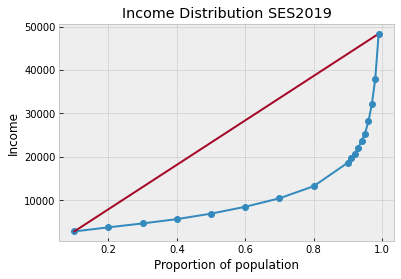

In [21]:
wq = DescrStatsW(data=df['A16'], weights=df['WT_POP'])
Q = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99]

IncomeQ = wq.quantile(probs=np.array(Q),return_pandas=True).to_frame()
y_max = IncomeQ.loc[IncomeQ.index==Q[len(Q)-1]].values[0][0]
print(y_max)
y_min = IncomeQ.loc[IncomeQ.index==Q[0]].values[0][0]
print(y_min)

m = (y_max-y_min)/(Q[len(Q)-1]-Q[0])

y = np.zeros(100)
x = np.arange(Q[0],Q[len(Q)-1],(Q[len(Q)-1]-Q[0])/100)
print(x)

for i in range(100):
    y[i] = m*(x[i]-0.1)+y_min
print(y)

IncomeQ = IncomeQ.reset_index().rename(columns={0: 'income'})
IncomeQ


plt.style.use('bmh')
plt.plot(IncomeQ['p'],IncomeQ['income'],marker='o')
plt.plot(x,y)
plt.xlabel('Proportion of population')
plt.ylabel('Income')
plt.title('Income Distribution SES2019')
plt.savefig('C:\\Users\\mom371208\\Downloads\\TDRI\\แผน12\\Visualization\\lorenz_curve_2019.png',dpi=200)
plt.show()

C:\Users\mom371208\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


48337.0
2884.0
[0.1    0.1089 0.1178 0.1267 0.1356 0.1445 0.1534 0.1623 0.1712 0.1801
 0.189  0.1979 0.2068 0.2157 0.2246 0.2335 0.2424 0.2513 0.2602 0.2691
 0.278  0.2869 0.2958 0.3047 0.3136 0.3225 0.3314 0.3403 0.3492 0.3581
 0.367  0.3759 0.3848 0.3937 0.4026 0.4115 0.4204 0.4293 0.4382 0.4471
 0.456  0.4649 0.4738 0.4827 0.4916 0.5005 0.5094 0.5183 0.5272 0.5361
 0.545  0.5539 0.5628 0.5717 0.5806 0.5895 0.5984 0.6073 0.6162 0.6251
 0.634  0.6429 0.6518 0.6607 0.6696 0.6785 0.6874 0.6963 0.7052 0.7141
 0.723  0.7319 0.7408 0.7497 0.7586 0.7675 0.7764 0.7853 0.7942 0.8031
 0.812  0.8209 0.8298 0.8387 0.8476 0.8565 0.8654 0.8743 0.8832 0.8921
 0.901  0.9099 0.9188 0.9277 0.9366 0.9455 0.9544 0.9633 0.9722 0.9811]
[ 2884.    3338.53  3793.06  4247.59  4702.12  5156.65  5611.18  6065.71
  6520.24  6974.77  7429.3   7883.83  8338.36  8792.89  9247.42  9701.95
 10156.48 10611.01 11065.54 11520.07 11974.6  12429.13 12883.66 13338.19
 13792.72 14247.25 14701.78 15156.31 15610.84 16065.37 

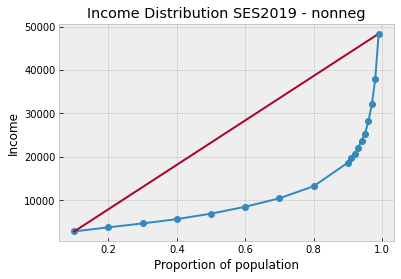

In [22]:
non_neg = df.copy()
non_neg.loc[non_neg['A16']<0]['A16']=0

wq = DescrStatsW(data=non_neg['A16'], weights=non_neg['WT_POP'])
Q = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99]
IncomeQ = wq.quantile(probs=np.array(Q),return_pandas=True).to_frame()
y_max = IncomeQ.loc[IncomeQ.index==Q[len(Q)-1]].values[0][0]
print(y_max)
y_min = IncomeQ.loc[IncomeQ.index==Q[0]].values[0][0]
print(y_min)

m = (y_max-y_min)/(0.99-0.1)

y = np.zeros(100)
x = np.arange(0.1,0.99,(0.99-0.1)/100)
print(x)

for i in range(100):
    y[i] = m*(x[i]-0.1)+y_min
print(y)

IncomeQ = IncomeQ.reset_index().rename(columns={0: 'income'})
IncomeQ


plt.style.use('bmh')
plt.plot(IncomeQ['p'],IncomeQ['income'],marker='o')
plt.plot(x,y)
plt.xlabel('Proportion of population')
plt.ylabel('Income')
plt.title('Income Distribution SES2019 - nonneg')
plt.savefig('C:\\Users\\mom371208\\Downloads\\TDRI\\แผน12\\Visualization\\lorenz_curve_nonneg_2019.png',dpi=200)
plt.show()

### Result

รายได้เฉลี่ยต่อหัวของกลุ่มประชากรร้อยละ 40 ที่มีรายได้ต่ำสุด : 
รายได้ 3,721 บาท (คิดจากรายได้ประจำเฉลี่ยต่อเดือนต่อคน)  

Income ratio ระหว่าง Top/Bottom ต่าง ๆ (90P10P, 90P50P, 50P10P)
- 90P/10P : 18006.0/2779.0 = 6.479
- 90P/50P : 18006.0/6614.0 = 2.722
- 50P/10P : 6614.0/2779.0 = 2.380

# Income Shares

In [21]:
filelist =[SES11,SES13,SES15,SES17,SES19]
Weight_income = {'2019':[],'2017':[],'2015':[],'2013':[],'2011':[]}
decile = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for Y in range(len(filelist)): 
    matchers = ['REC1_','RECORD01']
    matching = [s for s in filelist[Y] if any(xs in s.upper() for xs in matchers)]
    if Y == 4:
        print(filelist[Y])
        matchers = ['POV']
        matching = [s for s in filelist[Y] if any(xs in s.upper() for xs in matchers)]
    print(matching,matching[0])
    df, meta = pyreadstat.read_sav(matching[0])
    #print(matching[0])
    df.columns = [x.upper() for x in df.columns]
    matchers = [matching[0][-6:-4]]
    matching = [s for s in WT if any(xs in s.upper() for xs in matchers)]
    weight, meta1 = pyreadstat.read_sav(matching[0])
    #print(matching[0])
    if (matching[0][-6:-4] == '11'):
        weight.rename(columns={'hhid': 'HHID'}, inplace=True)
        weight.columns = [x.upper() for x in weight.columns]
        #print(df.columns)
        #print(weight.columns)
        df = pd.merge(df,weight[['HHID','WT_POP']],on='HHID')
    elif Y==4:
        df = df
    else:
        df.rename(columns={'NEW_HH_N': 'NEW_HH_NO'}, inplace=True)
        weight.rename(columns={'hhid': 'NEW_HH_NO'}, inplace=True)
        weight.columns = [x.upper() for x in weight.columns]
        #print(df.columns)
        #print(weight.columns)
        df = pd.merge(df,weight,on='NEW_HH_NO')
    
    df['income'] = df["A16"].fillna(0)
    
    year = ['2011','2013','2015','2017','2019']
    print(year[Y])
    
    wq = DescrStatsW(data=df['income'], weights=df['WT_POP'])
    print(wq.quantile(probs=np.array(decile),return_pandas=True))
    cri = wq.quantile(probs=np.array(decile),return_pandas=False)
    for i in range(0,len(cri)+1):
        if i > 0 and i < len(cri):
            #print(cri[i],end=' // ')
            X = df.loc[(df['income']<cri[i])&(df['income']>=cri[i-1])]
            y = np.sum(X['WT_POP']*X['income'])/np.sum(X['WT_POP'])
        elif i == 0:
            #print(cri[i],end=' // ')
            X = df.loc[(df['income']<cri[i])]
            y = np.sum(df['WT_POP']*X['income'])/np.sum(X['WT_POP'])
        elif i == len(cri):
            #print(cri[i-1],end=' // ')
            X = df.loc[(df['income']>=cri[i-1])]
            y = np.sum(X['WT_POP']*X['income'])/np.sum(X['WT_POP'])
        Weight_income[year[Y]].append(y)
Weight_income

['SES\\SES11\\rec1_11.sav', 'SES\\SES11\\6month\\rec1_11.sav'] SES\SES11\rec1_11.sav
2011
p
0.1     2074.0
0.2     2790.0
0.3     3450.0
0.4     4202.0
0.5     5065.0
0.6     6226.0
0.7     7711.0
0.8    10077.0
0.9    15100.0
dtype: float64
['SES\\SES13\\rec1_13.sav'] SES\SES13\rec1_13.sav
2013
p
0.1     2390.0
0.2     3226.0
0.3     4062.0
0.4     4992.0
0.5     6050.0
0.6     7446.0
0.7     9233.0
0.8    12047.0
0.9    17392.0
dtype: float64
['SES\\SES15\\rec1_15.sav'] SES\SES15\rec1_15.sav
2015
p
0.1     2681.0
0.2     3541.0
0.3     4375.0
0.4     5345.0
0.5     6485.0
0.6     7880.0
0.7     9690.0
0.8    12417.0
0.9    17975.0
dtype: float64
['SES\\SES17\\rec1_17.sav', 'SES\\SES17\\Microdata\\ses2017q1234_record01.sav'] SES\SES17\rec1_17.sav
2017
p
0.1     2624.0
0.2     3514.0
0.3     4367.0
0.4     5346.0
0.5     6531.0
0.6     8026.0
0.7     9989.0
0.8    12700.0
0.9    18724.0
dtype: float64
['SES\\SES19\\.Rhistory', 'SES\\SES19\\POV19.sav', 'SES\\SES19\\REC10_19.sav', 'SES\\

{'2019': [2049.3619394980847,
  3363.3996513943057,
  4265.210141345164,
  5205.59266029371,
  6314.042662275565,
  7735.02848644138,
  9484.246275962123,
  11794.873214000403,
  15576.448209769782,
  32663.098843883006],
 '2017': [1757.8060238803384,
  3079.181053436848,
  3947.4201120549656,
  4844.37230951669,
  5927.57833818462,
  7243.520267486302,
  8919.020369472708,
  11267.862101067241,
  15214.9755364409,
  33921.33875265209],
 '2015': [1484.0128436612638,
  3125.720057599015,
  3950.10711918143,
  4849.935947286146,
  5885.6898638008915,
  7151.738698099242,
  8729.837730236219,
  10926.189364063435,
  14763.480239701357,
  32738.406047580447],
 '2013': [957.1987672313597,
  2810.76824948438,
  3651.7023277462436,
  4504.6729002094535,
  5499.764133447334,
  6703.900034610666,
  8283.64842744574,
  10554.306994185834,
  14284.863251165325,
  33344.79361983928],
 '2011': [1245.4809128581758,
  2441.8237617077825,
  3104.5779254523186,
  3814.82667132772,
  4619.1900974647515,

In [20]:
group_decile = decile.copy()
group_decile.append(1)
group_decile = [x*10 for x in group_decile]
data = {'Decile group': group_decile
        , 'Weight 2019': Weight_income['2019']
        ,'Weight 2017': Weight_income['2017'],'Weight 2015': Weight_income['2015']
        ,'Weight 2013': Weight_income['2013'],'Weight 2011': Weight_income['2011']}
decile_w = pd.DataFrame.from_dict(data)
for i in decile_w:
    decile_w[f'ratio_{i}'] = decile_w[f'{i}'] /  decile_w[f'{i}'].sum()
decile_w

,Decile group,Weight 2019,Weight 2017,Weight 2015,Weight 2013,Weight 2011,ratio_Decile group,ratio_Weight 2019,ratio_Weight 2017,ratio_Weight 2015,ratio_Weight 2013,ratio_Weight 2011
0,1.0,1.420400e+10,1.188358e+10,9.975798e+09,6.387511e+09,8.242446e+09,0.018182,0.020811,0.018271,0.015846,0.010560,0.015546
1,2.0,2.328848e+10,2.081569e+10,2.101612e+10,1.876672e+10,1.616598e+10,0.036364,0.034120,0.032003,0.033382,0.031027,0.030491
2,3.0,2.956020e+10,2.673799e+10,2.652758e+10,2.435261e+10,2.055710e+10,0.054545,0.043309,0.041109,0.042136,0.040262,0.038773
3,4.0,3.612712e+10,3.276450e+10,3.263855e+10,3.008910e+10,2.526759e+10,0.072727,0.052931,0.050374,0.051843,0.049746,0.047657
4,5.0,4.375112e+10,4.007141e+10,3.954447e+10,3.672056e+10,3.056746e+10,0.090909,0.064101,0.061608,0.062813,0.060710,0.057653
5,6.0,5.362930e+10,4.906322e+10,4.813744e+10,4.469613e+10,3.726120e+10,0.109091,0.078573,0.075433,0.076462,0.073896,0.070278
6,7.0,6.539432e+10,6.034447e+10,5.869206e+10,5.538159e+10,4.588332e+10,0.127273,0.095811,0.092777,0.093227,0.091562,0.086541
7,8.0,8.218387e+10,7.620742e+10,7.345147e+10,7.044033e+10,5.792066e+10,0.145455,0.120409,0.117166,0.116671,0.116458,0.109244
8,9.0,1.079736e+11,1.029179e+11,9.916714e+10,9.535776e+10,8.003532e+10,0.163636,0.158194,0.158232,0.157517,0.157654,0.150955
9,10.0,2.264258e+11,2.296173e+11,2.204126e+11,2.226623e+11,2.082925e+11,0.181818,0.331741,0.353027,0.350104,0.368125,0.392861


# Growth incidence curve

In [50]:
filelist =[SES11,SES13,SES15,SES17,SES19]
Mean = {'2019':[],'2017':[],'2015':[],'2013':[],'2011':[]}
decile = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for Y in range(len(filelist)): 
    matchers = ['REC1_','RECORD01']
    matching = [s for s in filelist[Y] if any(xs in s.upper() for xs in matchers)]
    df, meta = pyreadstat.read_sav(matching[0])
    #print(matching[0])
    df.columns = [x.upper() for x in df.columns]
    matchers = [matching[0][-6:-4]]
    matching = [s for s in WT if any(xs in s.upper() for xs in matchers)]
    weight, meta1 = pyreadstat.read_sav(matching[0])
    #print(matching[0])
    if matching[0][-6:-4] == '11':
        weight.rename(columns={'hhid': 'HHID'}, inplace=True)
        weight.columns = [x.upper() for x in weight.columns]
        #print(df.columns)
        #print(weight.columns)
        df = pd.merge(df,weight,on='HHID')
    else:
        df.rename(columns={'NEW_HH_N': 'NEW_HH_NO'}, inplace=True)
        weight.rename(columns={'hhid': 'NEW_HH_NO'}, inplace=True)
        weight.columns = [x.upper() for x in weight.columns]
        #print(df.columns)
        #print(weight.columns)
        df = pd.merge(df,weight,on='NEW_HH_NO')
    
    df['income'] = df["A16"].fillna(0)
    
    year = ['2011','2013','2015','2017','2019']
    print(year[Y])
    
    wq = DescrStatsW(data=df['income'], weights=df['WT_POP'])
    print(wq.quantile(probs=np.array(decile),return_pandas=True))
    cri = wq.quantile(probs=np.array(decile),return_pandas=False)
    for i in range(0,len(cri)+1):
        if i > 0 and i < len(cri):
            #print(cri[i],end=' // ')
            X = df.loc[(df['income']<cri[i])&(df['income']>=cri[i-1])]
            y = np.sum(X['WT_POP']*X['income'])/np.sum(X['WT_POP'])
        elif i == 0:
            #print(cri[i],end=' // ')
            X = df.loc[(df['income']<cri[i])]
            y = np.sum(df['WT_POP']*X['income'])/np.sum(X['WT_POP'])
        elif i == len(cri):
            #print(cri[i-1],end=' // ')
            X = df.loc[(df['income']>=cri[i-1])]
            y = np.sum(X['WT_POP']*X['income'])/np.sum(X['WT_POP'])
        Mean[year[Y]].append(y)
Mean

2011
p
0.1     2074.0
0.2     2790.0
0.3     3450.0
0.4     4202.0
0.5     5065.0
0.6     6226.0
0.7     7711.0
0.8    10077.0
0.9    15100.0
dtype: float64
2013
p
0.1     2390.0
0.2     3226.0
0.3     4062.0
0.4     4992.0
0.5     6050.0
0.6     7446.0
0.7     9233.0
0.8    12047.0
0.9    17392.0
dtype: float64
2015
p
0.1     2681.0
0.2     3541.0
0.3     4375.0
0.4     5345.0
0.5     6485.0
0.6     7880.0
0.7     9690.0
0.8    12417.0
0.9    17975.0
dtype: float64
2017
p
0.1     2624.0
0.2     3514.0
0.3     4367.0
0.4     5346.0
0.5     6531.0
0.6     8026.0
0.7     9989.0
0.8    12700.0
0.9    18724.0
dtype: float64
2019
p
0.1     2884.0
0.2     3823.0
0.3     4722.0
0.4     5712.0
0.5     6973.0
0.6     8551.0
0.7    10500.0
0.8    13278.0
0.9    18699.0
dtype: float64


{'2019': [2049.3619394980847,
  3363.3996513943057,
  4265.210141345164,
  5205.59266029371,
  6314.042662275565,
  7735.02848644138,
  9484.246275962123,
  11794.873214000403,
  15576.448209769782,
  32663.098843883006],
 '2017': [1757.8060238803384,
  3079.181053436848,
  3947.4201120549656,
  4844.37230951669,
  5927.57833818462,
  7243.520267486302,
  8919.020369472708,
  11267.862101067241,
  15214.9755364409,
  33921.33875265209],
 '2015': [1484.0128436612638,
  3125.720057599015,
  3950.10711918143,
  4849.935947286146,
  5885.6898638008915,
  7151.738698099242,
  8729.837730236219,
  10926.189364063435,
  14763.480239701357,
  32738.406047580447],
 '2013': [957.1987672313597,
  2810.76824948438,
  3651.7023277462436,
  4504.6729002094535,
  5499.764133447334,
  6703.900034610666,
  8283.64842744574,
  10554.306994185834,
  14284.863251165325,
  33344.79361983928],
 '2011': [1245.4809128581758,
  2441.8237617077825,
  3104.5779254523186,
  3814.82667132772,
  4619.1900974647515,

In [51]:
group_decile = decile.copy()
group_decile.append(1)
group_decile = [x*10 for x in group_decile]
data = {'Decile group': group_decile
        , 'Mean income 2019': Mean['2019']
        ,'Mean income 2017': Mean['2017'],'Mean income 2015': Mean['2015']
        ,'Mean income 2013': Mean['2013'],'Mean income 2011': Mean['2011']}
decile = pd.DataFrame.from_dict(data)

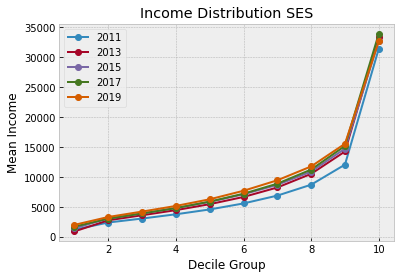

In [52]:
plt.style.use('bmh')
for y in year:
    plt.plot(decile['Decile group'],decile[f'Mean income {y}'],marker='o', label=f'{y}')
plt.xlabel('Decile Group')
plt.ylabel('Mean Income')
plt.title('Income Distribution SES')
plt.legend()
plt.savefig('C:\\Users\\mom371208\\Downloads\\TDRI\\แผน12\\Visualization\\Avg_Decile_income.png',dpi=200)
plt.show()

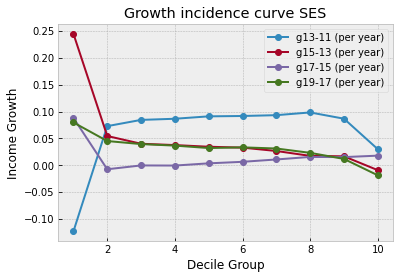

,Decile group,Mean income 2019,Mean income 2017,Mean income 2015,Mean income 2013,Mean income 2011,g19-17 (per year),g17-15 (per year),g15-13 (per year),g13-11 (per year)
0,1.0,2049.361939,1757.806024,1484.012844,957.198767,1245.480913,0.079752,0.088345,0.245139,-0.123337
1,2.0,3363.399651,3079.181053,3125.720058,2810.768249,2441.823762,0.045133,-0.007472,0.054539,0.072890
2,3.0,4265.210141,3947.420112,3950.107119,3651.702328,3104.577925,0.039474,-0.000340,0.040056,0.084542
3,4.0,5205.592660,4844.372310,4849.935947,4504.672900,3814.826671,0.036612,-0.000574,0.037615,0.086661
4,5.0,6314.042662,5927.578338,5885.689864,5499.764133,4619.190097,0.032084,0.003552,0.034491,0.091162
5,6.0,7735.028486,7243.520267,7151.738698,6703.900035,5623.727938,0.033371,0.006396,0.032861,0.091821
6,7.0,9484.246276,8919.020369,8729.837730,8283.648427,6929.412540,0.031200,0.010777,0.026579,0.093359
7,8.0,11794.873214,11267.862101,10926.189364,10554.306994,8747.476543,0.023118,0.015515,0.017465,0.098433
8,9.0,15576.448210,15214.975536,14763.480240,14284.863251,12094.364329,0.011809,0.015176,0.016615,0.086792
9,10.0,32663.098844,33921.338753,32738.406048,33344.793620,31432.877935,-0.018722,0.017906,-0.009134,0.029964


In [53]:
decile['g19-17 (per year)'] = ((decile['Mean income 2019']/decile['Mean income 2017'])**(0.5))-1
decile['g17-15 (per year)'] = ((decile['Mean income 2017']/decile['Mean income 2015'])**(0.5))-1
decile['g15-13 (per year)'] = ((decile['Mean income 2015']/decile['Mean income 2013'])**(0.5))-1
decile['g13-11 (per year)'] = ((decile['Mean income 2013']/decile['Mean income 2011'])**(0.5))-1

for y in ['g13-11 (per year)','g15-13 (per year)','g17-15 (per year)','g19-17 (per year)']:
    plt.plot(decile['Decile group'],decile[f'{y}'],marker='o', label=f'{y}')
plt.xlabel('Decile Group')
plt.ylabel('Income Growth')
plt.title('Growth incidence curve SES')
plt.legend()
plt.savefig('C:\\Users\\mom371208\\Downloads\\TDRI\\แผน12\\Visualization\\Growth incidence curve.png',dpi=200)
plt.show()

decile

## Gini

In [14]:
def gini(x, w=None):
    # The rest of the code requires numpy arrays.
    x = np.asarray(x)
    if w is not None:
        w = np.asarray(w)
        sorted_indices = np.argsort(x)
        sorted_x = x[sorted_indices]
        sorted_w = w[sorted_indices]
        # Force float dtype to avoid overflows
        cumw = np.cumsum(sorted_w, dtype=float)
        cumxw = np.cumsum(sorted_x * sorted_w, dtype=float)
        return (np.sum(cumxw[1:] * cumw[:-1] - cumxw[:-1] * cumw[1:]) / 
                (cumxw[-1] * cumw[-1]))
    else:
        sorted_x = np.sort(x)
        n = len(x)
        cumx = np.cumsum(sorted_x, dtype=float)
        # The above formula, with all weights equal to 1 simplifies to:
        return (n + 1 - 2 * np.sum(cumx) / cumx[-1]) / n
#reference: https://stackoverflow.com/questions/48999542/more-efficient-weighted-gini-coefficient-in-python
#R's reldist::gini() and R's DescTools::Gini

In [15]:
dfgini = pd.DataFrame(np.array([['test', 'test', "test"]]), columns=["Year","Income","Consumption"])
matchers = ['REC1_','RECORD01']
matching = [s for s in filelist if any(xs in s.upper() for xs in matchers)]
for Y in matching:
    checkout = ["6month", "q1234","For_TDRI",'q12']
    if any(x in Y for x in checkout):
        continue
    print('20',Y[-6:-4],sep='')
    print(Y)
    df, meta = pyreadstat.read_sav(Y)
    df.columns = [x.upper() for x in df.columns]
    matchers2 = [Y[-6:-4]]
    matching2 = [s for s in WT if any(xs in s.upper() for xs in matchers2)]
    print(matching2[0])
    weight, meta1 = pyreadstat.read_sav(matching2[0])
    #print(matching[0])
    try:
        weight.rename(columns={'hhid': 'HHID'}, inplace=True)
        weight.columns = [x.upper() for x in weight.columns]
        #print(df.columns)
        #print(weight.columns)
        df1 = pd.merge(df,weight,on='HHID')
    except:
        df.rename(columns={'NEW_HH_N': 'NEW_HH_NO'}, inplace=True)
        weight.rename(columns={'hhid': 'NEW_HH_NO'}, inplace=True)
        weight.rename(columns={'HHID': 'NEW_HH_NO'}, inplace=True)
        weight.columns = [x.upper() for x in weight.columns]
        #print(df.columns)
        #print(weight.columns)
        df1 = pd.merge(df,weight,on='NEW_HH_NO')
    
    df1['income'] = df1["A16"].fillna(0)
    df1['consumption'] = df1['A11'].fillna(0)
    
    I_gini = gini(df1['income'], df1['WT_POP'])
    C_gini = gini(df1['consumption'], df1['WT_POP'])
    print("Income GIG:", I_gini)
    print("Consumption GIG:", C_gini)
    
    newrow = pd.DataFrame([['20'+Y[-6:-4], I_gini, C_gini]], columns=["Year","Income","Consumption"])
    dfgini = dfgini.append(newrow)

2011
D:\TDRI CODE\SES\SES11\rec1_11.sav
D:\TDRI CODE\SES\weight\weight11\weight11.sav
Income GIG: 0.48865979240442825
Consumption GIG: 0.3770602236473614
2013
D:\TDRI CODE\SES\SES13\rec1_13.sav
D:\TDRI CODE\SES\weight\weight13\weight13.sav
Income GIG: 0.47766248847238235
Consumption GIG: 0.37998483362158364
2015
D:\TDRI CODE\SES\SES15\rec1_15.sav
D:\TDRI CODE\SES\weight\weight15\weight15.sav
Income GIG: 0.45212525867859354
Consumption GIG: 0.3604712899448299
2017
D:\TDRI CODE\SES\SES17\rec1_17.sav
D:\TDRI CODE\SES\weight\weight17\weight17.sav
Income GIG: 0.4548493870079902
Consumption GIG: 0.36523785055599933
2019
D:\TDRI CODE\SES\SES19\REC1_19.sav
D:\TDRI CODE\SES\weight\weight19\weight19.sav
Income GIG: 0.4312388517313613
Consumption GIG: 0.34987885693652643


In [16]:
#GINI index for 2020
matchers = ['REC1_','RECORD01']
matching = [s for s in filelist if any(xs in s.upper() for xs in matchers)]
print(matching[8])
df, meta = pyreadstat.read_sav(matching[8])
df.columns = [x.upper() for x in df.columns]

df['income'] = df["B01"].fillna(0)
df['consumption'] = df['A11'].fillna(0)

I_gini = gini(df['income'], df['A52']*df['A04'])
C_gini = gini(df['consumption'], df['A52']*df['A04'])
newrow = pd.DataFrame([['2020', I_gini, C_gini]], columns=["Year","Income","Consumption"])
dfgini = dfgini.append(newrow)

IndexError: list index out of range

In [ ]:
dfgini

## Financial asset

In [71]:
j=1
print(filelist[j])
df, meta = pyreadstat.read_sav(filelist[j])

wq = DescrStatsW(data=df['A14'], weights=df['A52'])
#print(wq.quantile(probs=np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.91]),return_pandas=True))
cri = wq.quantile(probs=np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.91]),return_pandas=False)[3]
print("Cri 40P:",cri)

bottom40HH = list(df.loc[df['A14']<=cri]['NEW_HH_NO'])

SES 2562 (2019)//Microdata SES 2562//Microdata SES 2562 REC01.sav
Cri 40P: 14791.0


In [72]:
j=17
print(filelist[j])
df, meta = pyreadstat.read_sav(filelist[j])
df

SES 2562 (2019)//Microdata SES 2562//Microdata SES 2562 REC17.sav


,NEW_HH_NO,REG,CWT,AREA,A52,AD01,AD01_1,AD01_2,AD02,AD03,...,AD17,AD18,AD19,AD20,AD21,AD22,AD23,AD24,AD25,AD26
0,1.0,1.0,10.0,1.0,888.2155,12000000.0,12000000.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,1.0,10.0,1.0,888.2155,0.0,NaN,NaN,NaN,50000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,1.0,10.0,1.0,888.2155,20000000.0,20000000.0,NaN,NaN,1000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,1.0,10.0,1.0,888.2155,10000000.0,10000000.0,NaN,NaN,2000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,1.0,10.0,1.0,888.2155,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45581,55838.0,5.0,96.0,2.0,473.7067,360000.0,360000.0,NaN,NaN,32500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45582,55839.0,5.0,96.0,2.0,473.7067,260000.0,260000.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45583,55840.0,5.0,96.0,2.0,473.7067,390000.0,390000.0,NaN,NaN,17500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45584,55841.0,5.0,96.0,2.0,473.7067,375000.0,375000.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
len(bottom40HH)

19596

In [90]:
#AD04 #record17 #มูลค่าสินทรัพย์ทางการเงิน
all_FA = (df['AD04']*df['A52']).sum()
B40P_FA = (df.loc[(df['NEW_HH_NO']).isin(bottom40HH)]['AD04'])*(df.loc[(df['NEW_HH_NO']).isin(bottom40HH)]['A52'])
B40P_FA = B40P_FA.sum() 

In [92]:
(B40P_FA/all_FA)*100

10.716569758086308